In [1]:
import os
import sys

# run locally without install asynfed package
root = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(root)

In [2]:
import tensorflow as tf

2023-06-16 07:28:41.367585: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-16 07:28:41.405630: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-16 07:28:42.085491: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from asynfed.client.frameworks.tensorflow.tensorflow_framework import TensorflowFramework
from VGG16 import VGG16

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [5]:
if tf.config.list_physical_devices('GPU'):
    tf.config.set_visible_devices(tf.config.list_physical_devices('GPU')[0], 'GPU')
else:
    print("There is no gpu or your tensorflow is not built in with gpu support")

In [6]:
from data_preprocessing import *

/home/student02/anaconda3/envs/asynfed/lib/python3.8/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [7]:
data_path = "../../data/cifar_data/chunks/chunk_1.pickle"
batch_size = 128

In [8]:
train_ds, test_ds, data_size = load_training_dataset(train_dataset_path= data_path, batch_size= batch_size)


2023-06-16 07:28:43.673854: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22301 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:19:00.0, compute capability: 8.6


In [9]:
data_size, batch_size, len(train_ds)

(8823, 128, 63)

tf.Tensor([0.35686275 0.10588235 0.10980392], shape=(3,), dtype=float64)


2023-06-16 07:28:44.343452: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [7940,32,32,3]
	 [[{{node Placeholder/_0}}]]
2023-06-16 07:28:44.343679: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype uint8 and shape [7940]
	 [[{{node Placeholder/_1}}]]


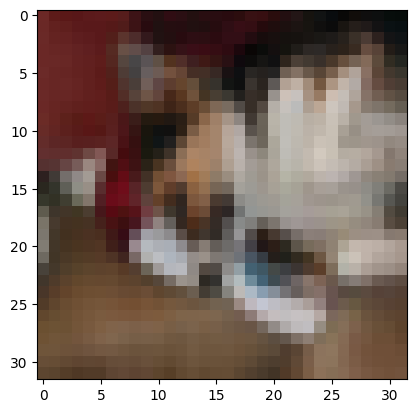

In [10]:
import matplotlib.pyplot as plt
for images, labels in train_ds:
    i = 50
    image = images[i]
    x, y = 3, 5
    print(image[x, y])
    plt.imshow(image)
    break

In [11]:
vgg_model = VGG16()
model = TensorflowFramework(vgg_model)

# training without augmented data

EPOCHS = 5

for epoch in range(EPOCHS):

  for images, labels in train_ds:
    train_acc, train_loss = model.fit(images, labels)

  for test_images, test_labels in test_ds:
    test_acc, test_loss = model.evaluate(test_images, test_labels)

  print(
    f'Epoch {epoch + 1}, '
    f'Accuracy: {train_acc * 100}, '
    f'Loss: {train_loss}, '
    f'Test Accuracy: {test_acc * 100}'
    f'Test Loss: {test_loss}, '
  )

/home/student02/anaconda3/envs/asynfed/lib/python3.8/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-06-16 07:28:46.430685: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-06-16 07:28:47.082154: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-06-16 07:28:47.964277: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f6d68a90380 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-16 07:28:47.964296: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA RTX A5000, Compute Capability 8.6
2023-06-16 07:28:48.030690: I ./tens

Epoch 1, Accuracy: 9.861461073160172, Loss: 2.3025360107421875, Test Accuracy: 10.305775701999664Test Loss: 2.302603244781494, 
Epoch 2, Accuracy: 10.100755840539932, Loss: 2.3025524616241455, Test Accuracy: 10.305775701999664Test Loss: 2.3026270866394043, 
Epoch 3, Accuracy: 10.172124207019806, Loss: 2.302495002746582, Test Accuracy: 10.305775701999664Test Loss: 2.302633047103882, 
Epoch 4, Accuracy: 10.207808762788773, Loss: 2.302497625350952, Test Accuracy: 10.305775701999664Test Loss: 2.3026132583618164, 
Epoch 5, Accuracy: 10.226700454950333, Loss: 2.302504062652588, Test Accuracy: 10.305775701999664Test Loss: 2.3025903701782227, 


In [13]:
save_location = "../server/testweight_v1.pkl"
weights = model.get_weights()
with open(save_location, 'wb') as f:
    pickle.dump(weights, f)

In [ ]:
# augmented data
augmented_data = generate_augmented_data(tensor_ds= train_ds, augmentations_per_image= 10, batch_size= batch_size)
len(train_ds), len(augmented_data)

In [ ]:
vgg_model_1 = VGG16()
augmented_model = TensorflowFramework(vgg_model_1)

# training with augmented data

EPOCHS = 50

for epoch in range(EPOCHS):

  for images, labels in augmented_data:
    train_acc, train_loss = augmented_model.fit(images, labels)

  for test_images, test_labels in test_ds:
    test_acc, test_loss = augmented_model.evaluate(test_images, test_labels)

  print(
    f'Epoch {epoch + 1}, '
    f'Accuracy: {train_acc * 100}, '
    f'Loss: {train_loss}, '
    f'Test Accuracy: {test_acc * 100}'
    f'Test Loss: {test_loss}, '
  )